In [2]:
import pandas as pd
import numpy as np
import datetime
from scipy.stats import skew

import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

from sklearn import metrics
import pickle

In [3]:
#SIngapore HDB resale data from (1990-2024)
df1=pd.read_csv(r"D:\project\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [4]:
df2=pd.read_csv(r"D:\project\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [5]:
df3=pd.read_csv(r"D:\project\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [6]:
df4=pd.read_csv(r"D:\project\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [7]:
df5=pd.read_csv(r"D:\project\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df5.info()
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183894 entries, 0 to 183893
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                183894 non-null  object 
 1   town                 183894 non-null  object 
 2   flat_type            183894 non-null  object 
 3   block                183894 non-null  object 
 4   street_name          183894 non-null  object 
 5   storey_range         183894 non-null  object 
 6   floor_area_sqm       183894 non-null  float64
 7   flat_model           183894 non-null  object 
 8   lease_commence_date  183894 non-null  int64  
 9   remaining_lease      183894 non-null  object 
 10  resale_price         183894 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 15.4+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [8]:
df5['remaining_lease']=df5['remaining_lease'].str.split(' ').str[0].astype(int)
df5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0


In [9]:
#combine the dataset using concat

df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930097 entries, 0 to 930096
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                930097 non-null  object 
 1   town                 930097 non-null  object 
 2   flat_type            930097 non-null  object 
 3   block                930097 non-null  object 
 4   street_name          930097 non-null  object 
 5   storey_range         930097 non-null  object 
 6   floor_area_sqm       930097 non-null  float64
 7   flat_model           930097 non-null  object 
 8   lease_commence_date  930097 non-null  int64  
 9   resale_price         930097 non-null  float64
 10  remaining_lease      221047 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 78.1+ MB


In [10]:
#Spliting colums
df[['year','month']]=df['month'].str.split('-',expand=True) #split the year in the month column
df['block'] = df['block'].str.split(r'(\D)', expand=True)[0].astype('int64') #r'(\D)' splits a string at the first non-digit character.

df[['storey_start','storey_end']]=df['storey_range'].str.split('TO',expand=True) #split the storeyrange

#changing the following columns into numeric
df['month']=pd.to_numeric(df['month'])
df['year']=pd.to_numeric(df['year'])
df['floor_area_sqm']=pd.to_numeric(df['floor_area_sqm'])
df['resale_price']=pd.to_numeric(df['resale_price'])
df['storey_start']=pd.to_numeric(df['storey_start'])
df['storey_end']=pd.to_numeric(df['storey_end'])

df.drop(columns='storey_range',inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930097 entries, 0 to 930096
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                930097 non-null  int64  
 1   town                 930097 non-null  object 
 2   flat_type            930097 non-null  object 
 3   block                930097 non-null  int64  
 4   street_name          930097 non-null  object 
 5   floor_area_sqm       930097 non-null  float64
 6   flat_model           930097 non-null  object 
 7   lease_commence_date  930097 non-null  int64  
 8   resale_price         930097 non-null  float64
 9   remaining_lease      221047 non-null  float64
 10  year                 930097 non-null  int64  
 11  storey_start         930097 non-null  int64  
 12  storey_end           930097 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 92.2+ MB


In [11]:
df['block'].max()

np.int64(999)

In [12]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
year                        0
storey_start                0
storey_end                  0
dtype: int64

In [13]:
df['remaining_lease'].fillna(99-(df['year']-df['lease_commence_date']),inplace=True)

mask= df['remaining_lease']>99
df=df[~mask]

In [14]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
storey_start           0
storey_end             0
dtype: int64

In [15]:
df.dtypes

month                    int64
town                    object
flat_type               object
block                    int64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
year                     int64
storey_start             int64
storey_end               int64
dtype: object

In [16]:
#handle the str error
df['flat_model']=df['flat_model'].str.upper()
df['flat_type']=df['flat_type'].replace({'MULTI GENERATION': 'MULTI-GENERATION'})

# Adding a new feature to improve results
df['price_per_sqm']=df['resale_price']/df['floor_area_sqm']
df['years_holding']=df['year']-df['lease_commence_date']
current_year =datetime.datetime.now().year

df['current_remaining_lease']=df['remaining_lease']-(current_year-df['year'])
df['age_of_property']=current_year-df['lease_commence_date']

In [18]:
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,storey_start,storey_end,price_per_sqm,years_holding,current_remaining_lease,age_of_property
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12,290.322581,13,51.0,48
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6,193.548387,13,51.0,48
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12,258.064516,13,51.0,48
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9,193.548387,13,51.0,48
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6,646.575342,14,50.0,49


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930046 entries, 0 to 930096
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    930046 non-null  int64  
 1   town                     930046 non-null  object 
 2   flat_type                930046 non-null  object 
 3   block                    930046 non-null  int64  
 4   street_name              930046 non-null  object 
 5   floor_area_sqm           930046 non-null  float64
 6   flat_model               930046 non-null  object 
 7   lease_commence_date      930046 non-null  int64  
 8   resale_price             930046 non-null  float64
 9   remaining_lease          930046 non-null  float64
 10  year                     930046 non-null  int64  
 11  storey_start             930046 non-null  int64  
 12  storey_end               930046 non-null  int64  
 13  price_per_sqm            930046 non-null  float64
 14  years_hol

In [20]:
df['town'].value_counts()

town
TAMPINES           80208
YISHUN             70105
JURONG WEST        67028
BEDOK              66557
WOODLANDS          66041
ANG MO KIO         52117
HOUGANG            50812
BUKIT BATOK        45273
CHOA CHU KANG      38517
BUKIT MERAH        34557
PASIR RIS          32972
SENGKANG           32377
TOA PAYOH          31763
QUEENSTOWN         28789
GEYLANG            28271
CLEMENTI           27984
KALLANG/WHAMPOA    27505
BUKIT PANJANG      27366
JURONG EAST        24803
SERANGOON          22815
BISHAN             21190
PUNGGOL            20670
SEMBAWANG          14519
MARINE PARADE       8063
CENTRAL AREA        7154
BUKIT TIMAH         2526
LIM CHU KANG          64
Name: count, dtype: int64

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,930046.0,6.533908,3.410090,1.000000,4.000000,7.000000,9.000000,1.200000e+01
block,930046.0,348.570617,255.268326,1.000000,127.000000,302.000000,534.000000,9.990000e+02
floor_area_sqm,930046.0,95.622476,25.808989,28.000000,73.000000,93.000000,113.000000,3.667000e+02
lease_commence_date,930046.0,1988.356581,10.776233,1966.000000,1981.000000,1986.000000,1996.000000,2.021000e+03
resale_price,930046.0,326311.463659,178195.060965,5000.000000,194000.000000,300000.000000,423000.000000,1.600000e+06
remaining_lease,930046.0,80.918948,10.892976,40.000000,74.000000,83.000000,90.000000,9.900000e+01
year,930046.0,2006.336681,9.547642,1990.000000,1999.000000,2005.000000,2014.000000,2.025000e+03
storey_start,930046.0,6.688828,4.827709,1.000000,4.000000,7.000000,10.000000,4.900000e+01
storey_end,930046.0,8.703533,4.827683,3.000000,6.000000,9.000000,12.000000,5.100000e+01
price_per_sqm,930046.0,3380.197448,1627.904152,161.290323,2294.117647,2962.962963,4280.821918,1.614894e+04


Skewness and Outliers

In [23]:
def compare_chart(df,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig, axs = plt.subplots( 1,4,figsize=(20,5))

        sns.histplot(data=df, x=col1, kde=True, bins=20,ax= axs[0],color="purple")
        axs[0].set_title(f"{col1} after log transformation")

        sns.boxplot(data=df, y=col1, ax=axs[1])
        axs[1].set_title(f"{col1} after outliers handle")

        sns.histplot(data=df, x=col2, kde=True, bins=20,ax= axs[2],color="purple")
        axs[2].set_title(f"{col2} before log transformation")

        sns.boxplot(data=df, y=col2, ax=axs[3])
        axs[3].set_title(f"{col2} before outliers handle")

        plt.tight_layout()
        plt.show()

In [24]:
def compare_chart(df,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig, axs = plt.subplots( 1,2,figsize=(15,5))

        sns.histplot(data=df, x=col2, kde=True, bins=20,ax= axs[0],color="purple")
        axs[0].set_title(f"{col2} before log transformation")

        sns.boxplot(data=df, y=col2, ax=axs[1])
        axs[1].set_title(f"{col2} before outliers handle")

        plt.tight_layout()
        plt.show()

In [29]:
df['floor_area_sqm_log']=np.log(df['floor_area_sqm'])
df['resale_price_log']=np.log(df['resale_price'])
df['remaining_lease_log']=np.log1p(df['remaining_lease'])
df['price_per_sqm_log']=np.log(df['price_per_sqm'])

In [25]:
#outliers handle with IQR and cliping method 

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

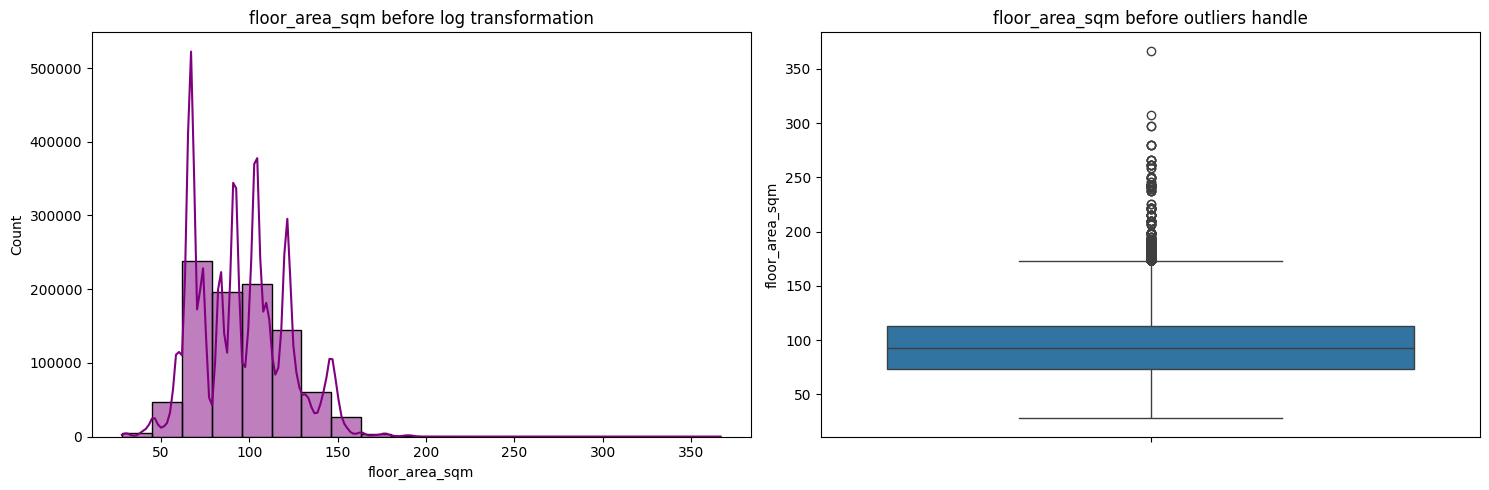

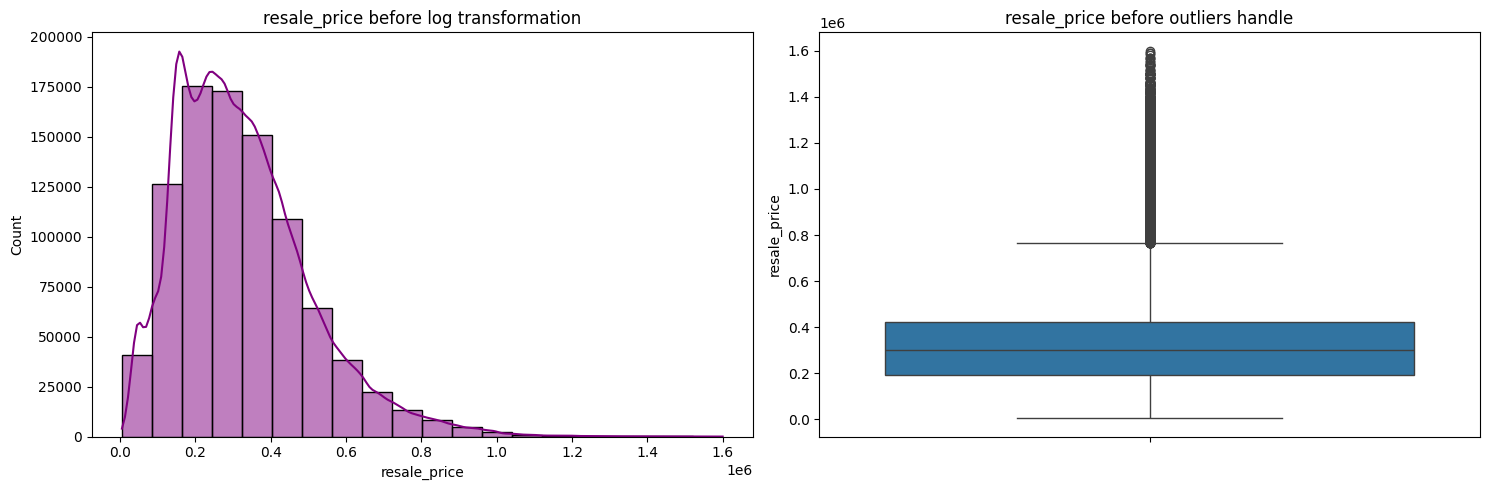

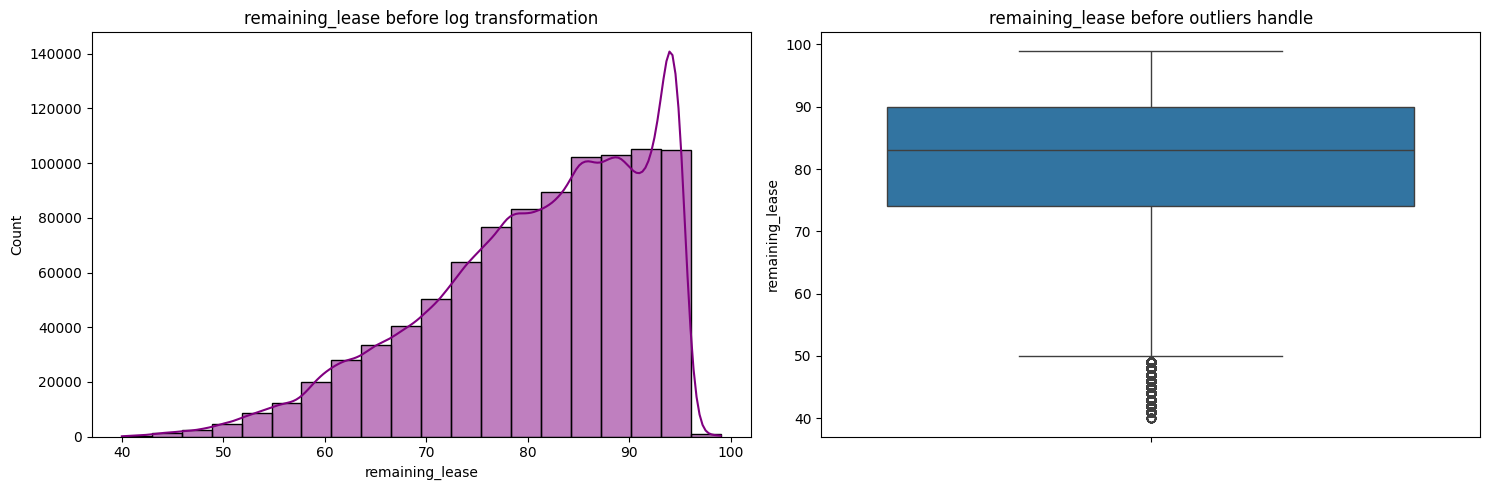

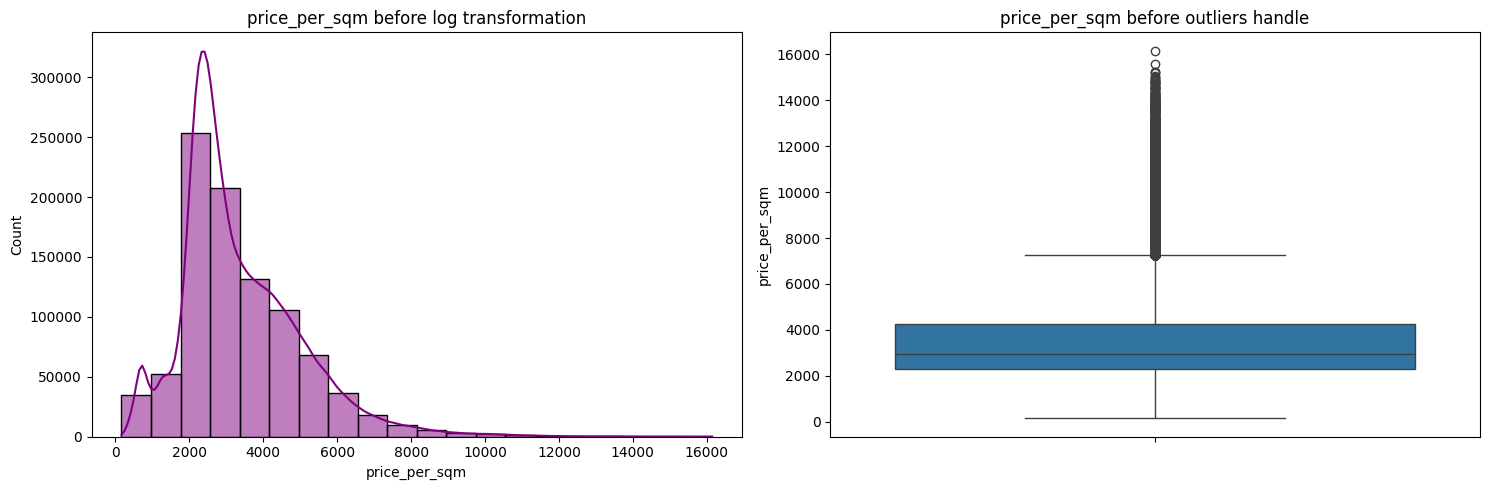

In [31]:
outlier(df,'floor_area_sqm_log')
outlier(df,'resale_price_log')
outlier(df,'remaining_lease_log')
outlier(df,'price_per_sqm_log')

col1=['floor_area_sqm_log','resale_price_log','remaining_lease_log','price_per_sqm_log']
col2=['floor_area_sqm','resale_price','remaining_lease','price_per_sqm']

compare_chart(df,col1,col2)

In [32]:
# after log transformation and outliers handle
def compare_chart(df,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig, axs = plt.subplots( 1,2,figsize=(15,5))

        sns.histplot(data=df, x=col1, kde=True, bins=20,ax= axs[0],color="purple")
        axs[0].set_title(f"{col1} after log transformation")

        sns.boxplot(data=df, y=col1, ax=axs[1])
        axs[1].set_title(f"{col2} after outliers handle")

        plt.tight_layout()
        plt.show()

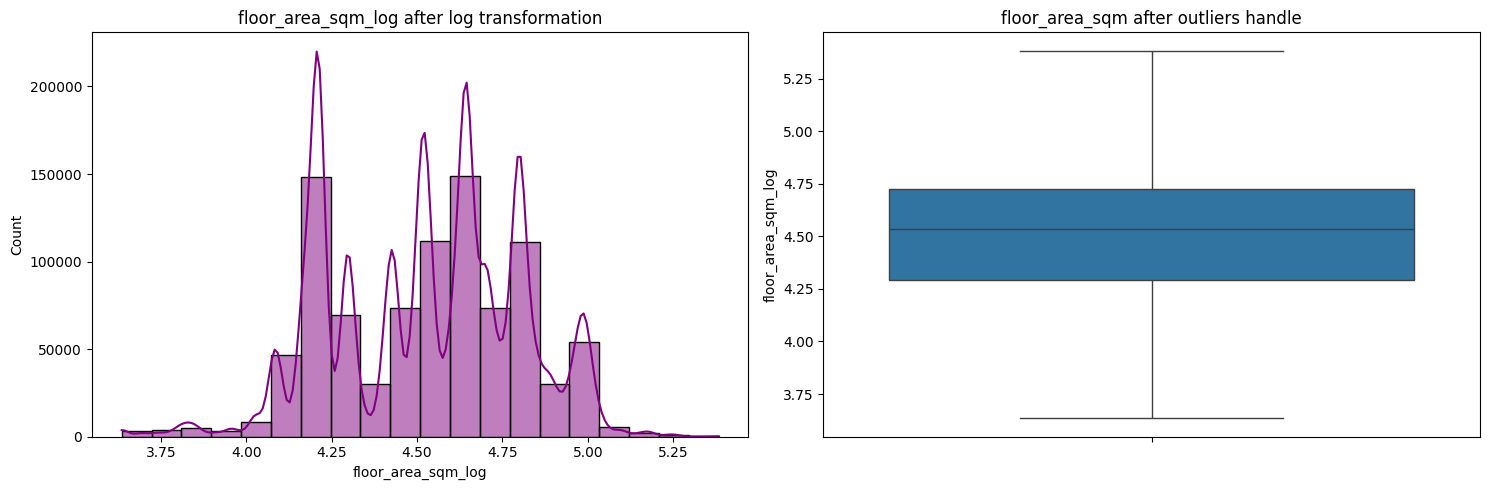

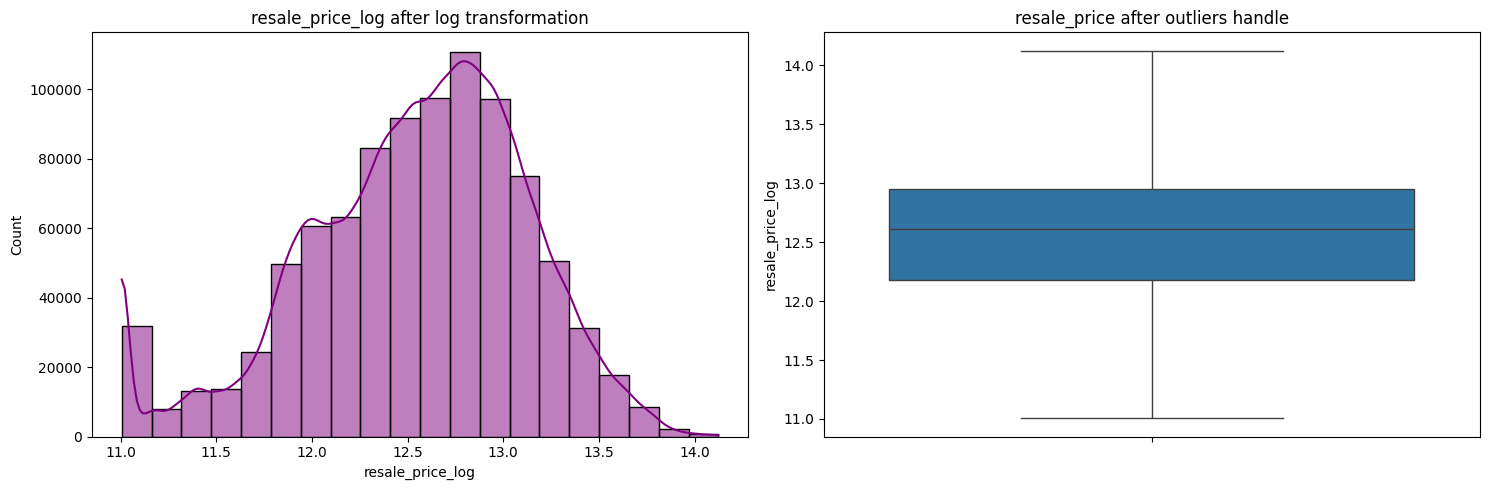

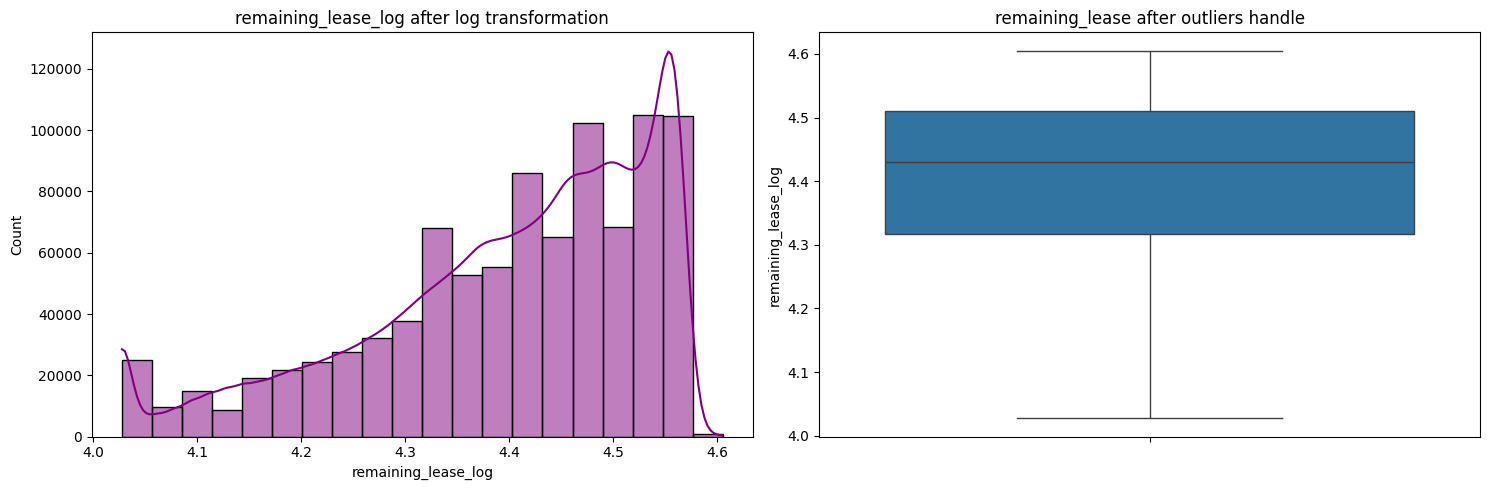

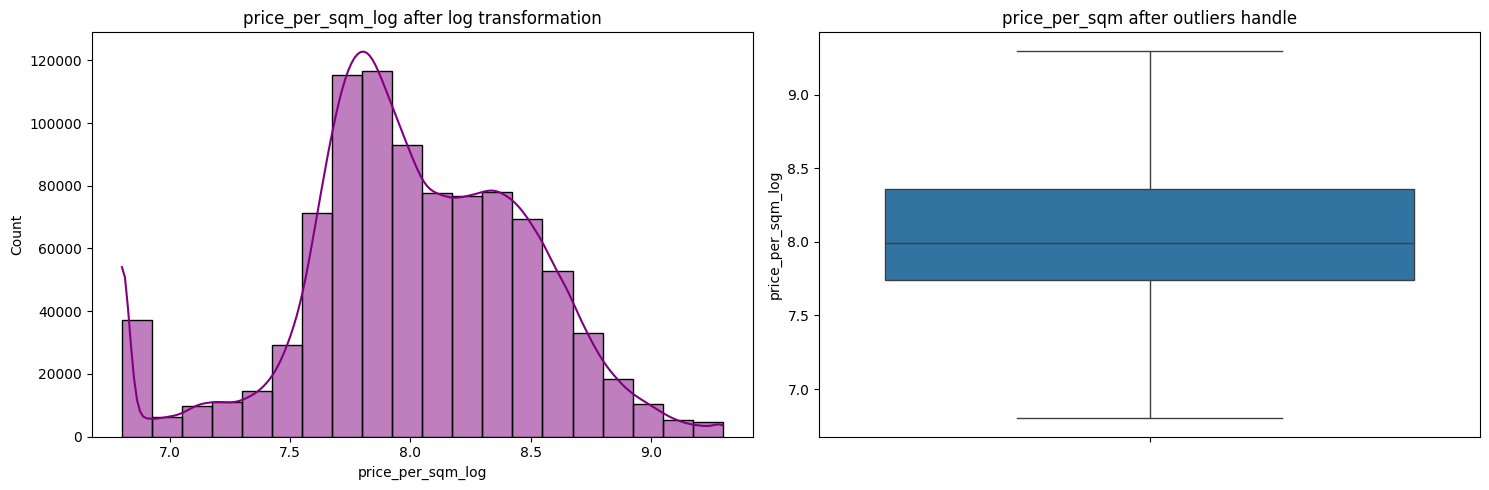

In [33]:
col1=['floor_area_sqm_log','resale_price_log','remaining_lease_log','price_per_sqm_log']
col2=['floor_area_sqm','resale_price','remaining_lease','price_per_sqm']

compare_chart(df,col1,col2)

In [34]:
#drop the columns 
df.drop(columns=['street_name', 'floor_area_sqm','resale_price','remaining_lease','price_per_sqm'],inplace=True)

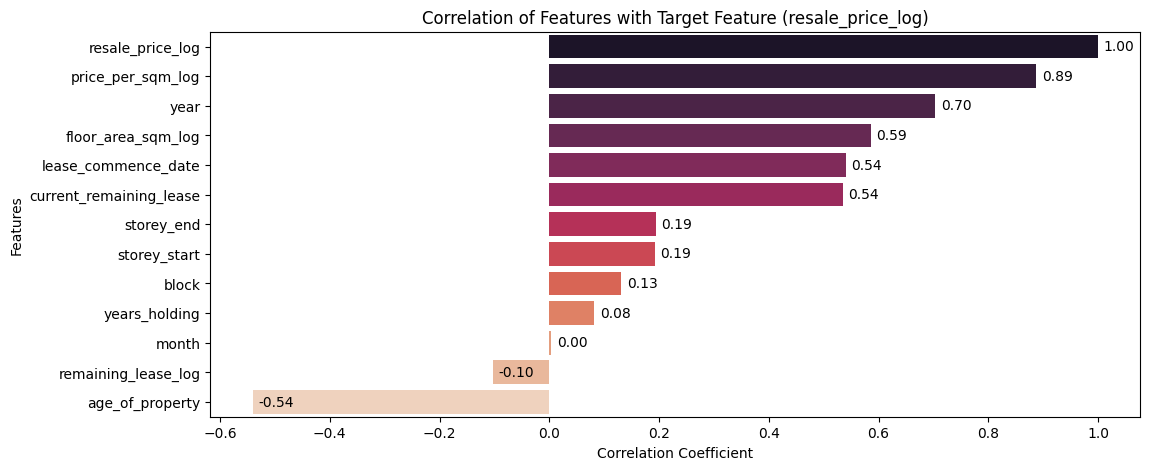

In [35]:
#Correlation of Features with barplot

corr_plt = df[['month', 'block', 'floor_area_sqm_log', 'lease_commence_date', 'resale_price_log', 'remaining_lease_log',
               'year', 'storey_start', 'storey_end', 'price_per_sqm_log', 'years_holding', 'current_remaining_lease',
               'age_of_property']].corr()

target_corr = corr_plt['resale_price_log'].sort_values(ascending=False)

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=target_corr.values, y=target_corr.index, palette='rocket')
plt.title('Correlation of Features with Target Feature (resale_price_log)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Annotate bars with correlation values
for i, v in enumerate(target_corr.values):
    ax.text(v + 0.01, i, f'{v:.2f}', color='black', va='center')

plt.show()

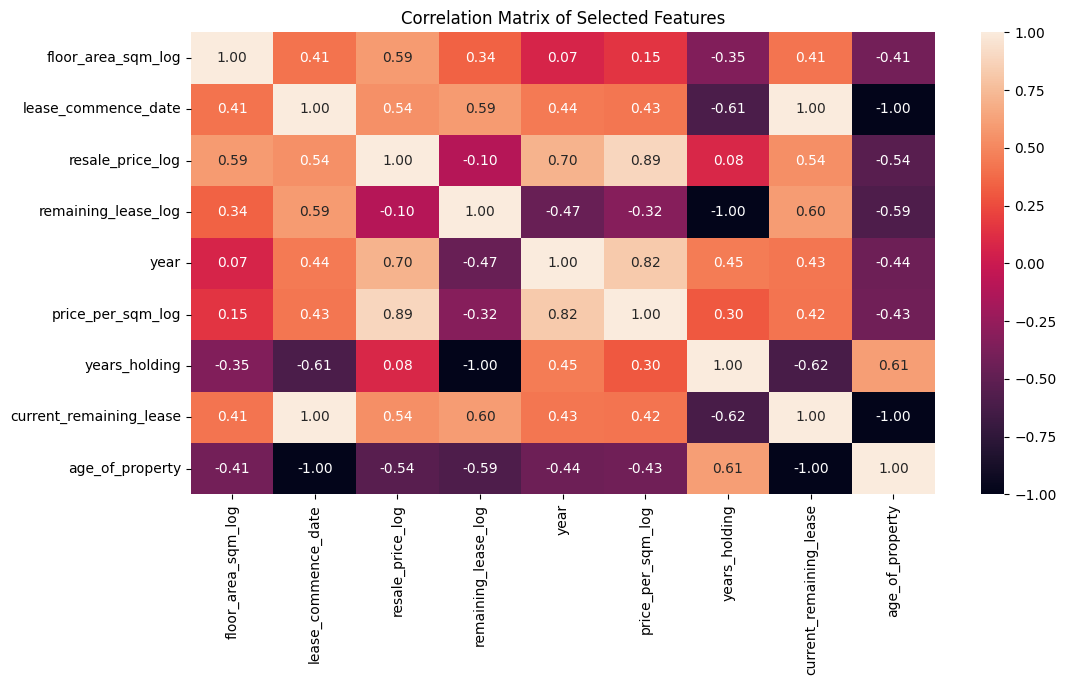

In [36]:
#  correlation analysis - Heatmap
selected_cols = [ 'floor_area_sqm_log', 'lease_commence_date', 'resale_price_log', 'remaining_lease_log',
                 'year', 'price_per_sqm_log', 'years_holding', 'current_remaining_lease',
                 'age_of_property']

# Calculating the correlation matrix
corr_matrix = df[selected_cols].corr()

# Creating a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

Data Modeling

In [37]:
df_new=df.copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930046 entries, 0 to 930096
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    930046 non-null  int64  
 1   town                     930046 non-null  object 
 2   flat_type                930046 non-null  object 
 3   block                    930046 non-null  int64  
 4   flat_model               930046 non-null  object 
 5   lease_commence_date      930046 non-null  int64  
 6   year                     930046 non-null  int64  
 7   storey_start             930046 non-null  int64  
 8   storey_end               930046 non-null  int64  
 9   years_holding            930046 non-null  int64  
 10  current_remaining_lease  930046 non-null  float64
 11  age_of_property          930046 non-null  int64  
 12  floor_area_sqm_log       930046 non-null  float64
 13  resale_price_log         930046 non-null  float64
 14  remaining

In [38]:
# function for encoding the catogorical features

from sklearn.preprocessing import LabelEncoder

def encoding(df,columns):
    le=LabelEncoder()

    df[columns]=le.fit_transform(df[columns])

    unique_labels = le.classes_
    encoded_values = le.transform(unique_labels)

    for i,j in zip(unique_labels,encoded_values):
        print(i,':',j)

In [39]:
df_new['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [40]:
encoding(df_new,'town')

ANG MO KIO : 0
BEDOK : 1
BISHAN : 2
BUKIT BATOK : 3
BUKIT MERAH : 4
BUKIT PANJANG : 5
BUKIT TIMAH : 6
CENTRAL AREA : 7
CHOA CHU KANG : 8
CLEMENTI : 9
GEYLANG : 10
HOUGANG : 11
JURONG EAST : 12
JURONG WEST : 13
KALLANG/WHAMPOA : 14
LIM CHU KANG : 15
MARINE PARADE : 16
PASIR RIS : 17
PUNGGOL : 18
QUEENSTOWN : 19
SEMBAWANG : 20
SENGKANG : 21
SERANGOON : 22
TAMPINES : 23
TOA PAYOH : 24
WOODLANDS : 25
YISHUN : 26


In [41]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [42]:
encoding(df_new,'flat_type')

1 ROOM : 0
2 ROOM : 1
3 ROOM : 2
4 ROOM : 3
5 ROOM : 4
EXECUTIVE : 5
MULTI-GENERATION : 6


In [43]:
df_new['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'DBSS', 'TYPE S1', 'TYPE S2', 'PREMIUM APARTMENT LOFT',
       '3GEN'], dtype=object)

In [44]:
encoding(df_new,'flat_model')

2-ROOM : 0
3GEN : 1
ADJOINED FLAT : 2
APARTMENT : 3
DBSS : 4
IMPROVED : 5
IMPROVED-MAISONETTE : 6
MAISONETTE : 7
MODEL A : 8
MODEL A-MAISONETTE : 9
MODEL A2 : 10
MULTI GENERATION : 11
NEW GENERATION : 12
PREMIUM APARTMENT : 13
PREMIUM APARTMENT LOFT : 14
PREMIUM MAISONETTE : 15
SIMPLIFIED : 16
STANDARD : 17
TERRACE : 18
TYPE S1 : 19
TYPE S2 : 20


In [45]:
df_new[['town','flat_type','flat_model']]=df_new[['town','flat_type','flat_model']].astype('int64')
df_new.head()

,month,town,flat_type,block,flat_model,lease_commence_date,year,storey_start,storey_end,years_holding,current_remaining_lease,age_of_property,floor_area_sqm_log,resale_price_log,remaining_lease_log,price_per_sqm_log
0,1,0,0,309,5,1977,1990,10,12,13,51.0,48,3.635067,11.006342,4.465908,6.802408
1,1,0,0,309,5,1977,1990,4,6,13,51.0,48,3.635067,11.006342,4.465908,6.802408
2,1,0,0,309,5,1977,1990,10,12,13,51.0,48,3.635067,11.006342,4.465908,6.802408
3,1,0,0,309,5,1977,1990,7,9,13,51.0,48,3.635067,11.006342,4.465908,6.802408
4,1,0,2,216,12,1976,1990,4,6,14,50.0,49,4.290459,11.006342,4.454347,6.802408


In [46]:
df.head()

,month,town,flat_type,block,flat_model,lease_commence_date,year,storey_start,storey_end,years_holding,current_remaining_lease,age_of_property,floor_area_sqm_log,resale_price_log,remaining_lease_log,price_per_sqm_log
0,1,ANG MO KIO,1 ROOM,309,IMPROVED,1977,1990,10,12,13,51.0,48,3.635067,11.006342,4.465908,6.802408
1,1,ANG MO KIO,1 ROOM,309,IMPROVED,1977,1990,4,6,13,51.0,48,3.635067,11.006342,4.465908,6.802408
2,1,ANG MO KIO,1 ROOM,309,IMPROVED,1977,1990,10,12,13,51.0,48,3.635067,11.006342,4.465908,6.802408
3,1,ANG MO KIO,1 ROOM,309,IMPROVED,1977,1990,7,9,13,51.0,48,3.635067,11.006342,4.465908,6.802408
4,1,ANG MO KIO,3 ROOM,216,NEW GENERATION,1976,1990,4,6,14,50.0,49,4.290459,11.006342,4.454347,6.802408


Regression model - To predict resale value

In [47]:
#split the data into x and y 

x=df_new.drop(['resale_price_log'],axis=1)
y=df_new['resale_price_log']

x.shape,y.shape

((930046, 15), (930046,))

train_test_split

In [48]:
# function to choose the best algorithm

def best_ML_algorithm(x,y,algorithms):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                
                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]  
        
        return best_algorithm, results

In [49]:
# using above function try to identify the best algorithm - [highest R² score as the best algorithm]

algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, ExtraTreesRegressor ]

best_algorithm, results = best_ML_algorithm(x,y, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                       Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                  0.007540            0.000891                 0.029843  0.997425
DecisionTreeRegressor             0.001293            0.000150                 0.012257  0.999566
RandomForestRegressor             0.000994            0.000077                 0.008800  0.999776
ExtraTreesRegressor               0.001130            0.000088                 0.009384  0.999745
**Best Algorithm:** RandomForestRegressor


In [50]:
  # Random forest regressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_regressor = RandomForestRegressor(n_estimators=100,max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.0009760492103244348
Mean Squared Error: 7.467963393340762e-05
Root Mean Squared Error: 0.008641737900064294
R-squared: 0.9997841048757686


In [51]:
# Desiciontree regressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_regressor = DecisionTreeRegressor(max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.0012132765641226712
Mean Squared Error: 0.00012451711819317198
Root Mean Squared Error: 0.011158723860422928
R-squared: 0.9996400271762819


In [52]:
#checkig the features scores and importants

feature_scores = pd.Series(model_regressor.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

price_per_sqm_log          0.804653
floor_area_sqm_log         0.185646
flat_type                  0.009446
age_of_property            0.000049
block                      0.000044
town                       0.000034
remaining_lease_log        0.000027
month                      0.000025
flat_model                 0.000017
year                       0.000013
years_holding              0.000012
storey_end                 0.000011
storey_start               0.000010
current_remaining_lease    0.000008
lease_commence_date        0.000006
dtype: float64

In [53]:
# store the model using pickle

with open('Decisiontreemodel.pkl','wb') as files:
    pickle.dump(model_regressor,files)


In [54]:
#load the pickle and predict the selling price with regressor model

with open('Decisiontreemodel.pkl','rb') as files:
    model=pickle.load(files)

predict=model.predict(np.array([[1,0,0,309,5,1977,1990,10,12,13,52.0,47,3.635067,4.465908,6.828872]]))
np.exp(predict[0])

np.float64(60255.09475766421)